# Seminal Work: Classification of objects with deposit using a RaspberryPi
Autoren: Sofie Scharaf, Dominic Viola

## Step 0: Prerequisits

In [1]:
!python --version

Python 3.10.6


In [2]:
# prerequisits
!pip install numpy pandas opencv-python keras tensorflow # if on Apple silicon also use this: tensorflow-metal

In [16]:
# imports and set seed so results are random, but stil reproducable
import tensorflow as tf
import keras
import tensorflow.keras.layers as layers
import random
import os  # Helps you manage files and folders
import cv2  # Working with images
import numpy as np
import seaborn as sns  # Helps you visualize your discoveries
import matplotlib.pyplot as plt  # To plot images

print("tensorflow version: "+ tf.__version__)
print("keras version: ", keras.__version__)

def set_seed(seed=0):
  np.random.seed(seed)
  tf.random.set_seed(seed)
  random.seed(seed)
  os.environ['TF_DETERMINISTIC_OPS'] = "1"
  os.environ['TF_CUDNN_DETERMINISM'] = "1"
  os.environ['PYTHONHASHSEED'] = str(seed)
  keras.utils.set_random_seed(seed)

set_seed()

tensorflow version: 2.16.1
keras version:  3.3.2


## Step 1: Find Datasets
We want to train a model to recognize and classify different kinds of Cans and bottles.
This will later be used in an IoT system that displays the price one would get for a certain type of can or bottle.

Hence, we need some training data to fine tune an existing model to recognize these classes.
Therefore, we download a dataset that contains can and bottle data, so that we can fine tune a model to recognize and classify them. 
Later on we may need some real world images of the actual cans we want to use our system on.

The CIFAR-100 dataset has come classes in the food_container superclass, that may be interesting for this use-case:
- bottles 
- cans 
- cups

See https://www.cs.toronto.edu/~kriz/cifar.html

Considerations that have to be made: 
1. Train only with the relevant classes and then also train with more classes to see if it improves the model ?
1. Add an additional class for other objects than cans and bottles to prevent many false positives ?


In [4]:
# download the dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar100.load_data(label_mode="fine")

In [5]:
label_names = [
    "apple",
    "aquarium_fish",
    "baby",
    "bear",
    "beaver",
    "bed",
    "bee",
    "beetle",
    "bicycle",
    "bottle",
    "bowl",
    "boy",
    "bridge",
    "bus",
    "butterfly",
    "camel",
    "can",
    "castle",
    "caterpillar",
    "cattle",
    "chair",
    "chimpanzee",
    "clock",
    "cloud",
    "cockroach",
    "couch",
    "crab",
    "crocodile",
    "cup",
    "dinosaur",
    "dolphin",
    "elephant",
    "flatfish",
    "forest",
    "fox",
    "girl",
    "hamster",
    "house",
    "kangaroo",
    "keyboard",
    "lamp",
    "lawn_mower",
    "leopard",
    "lion",
    "lizard",
    "lobster",
    "man",
    "maple_tree",
    "motorcycle",
    "mountain",
    "mouse",
    "mushroom",
    "oak_tree",
    "orange",
    "orchid",
    "otter",
    "palm_tree",
    "pear",
    "pickup_truck",
    "pine_tree",
    "plain",
    "plate",
    "poppy",
    "porcupine",
    "possum",
    "rabbit",
    "raccoon",
    "ray",
    "road",
    "rocket",
    "rose",
    "sea",
    "seal",
    "shark",
    "shrew",
    "skunk",
    "skyscraper",
    "snail",
    "snake",
    "spider",
    "squirrel",
    "streetcar",
    "sunflower",
    "sweet_pepper",
    "table",
    "tank",
    "telephone",
    "television",
    "tiger",
    "tractor",
    "train",
    "trout",
    "tulip",
    "turtle",
    "wardrobe",
    "whale",
    "willow_tree",
    "wolf",
    "woman",
    "worm"
]

In [6]:
# select the classes we want
train_labels = [label_names[int(idx)] for idx in y_train]
test_labels = [label_names[int(idx)] for idx in y_test]
test_labels

/var/folders/f_/mtgsl6n13zd4n7z20x96lx1m0000gn/T/ipykernel_24905/939403219.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  train_labels = [label_names[int(idx)] for idx in y_train]
/var/folders/f_/mtgsl6n13zd4n7z20x96lx1m0000gn/T/ipykernel_24905/939403219.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  test_labels = [label_names[int(idx)] for idx in y_test]


['mountain',
 'forest',
 'seal',
 'mushroom',
 'sea',
 'tulip',
 'camel',
 'butterfly',
 'cloud',
 'apple',
 'sea',
 'skunk',
 'streetcar',
 'rocket',
 'lamp',
 'lion',
 'tulip',
 'wolf',
 'rose',
 'orange',
 'rose',
 'mountain',
 'skunk',
 'dinosaur',
 'chimpanzee',
 'can',
 'keyboard',
 'bicycle',
 'bicycle',
 'rose',
 'chair',
 'plate',
 'lawn_mower',
 'turtle',
 'palm_tree',
 'shark',
 'pickup_truck',
 'boy',
 'couch',
 'house',
 'porcupine',
 'cockroach',
 'mountain',
 'shark',
 'palm_tree',
 'clock',
 'lawn_mower',
 'pickup_truck',
 'skunk',
 'castle',
 'beaver',
 'bee',
 'bottle',
 'pear',
 'baby',
 'flatfish',
 'sea',
 'oak_tree',
 'leopard',
 'rocket',
 'snail',
 'crocodile',
 'camel',
 'rabbit',
 'beetle',
 'girl',
 'lion',
 'sunflower',
 'porcupine',
 'tulip',
 'raccoon',
 'train',
 'ray',
 'trout',
 'flatfish',
 'flatfish',
 'sunflower',
 'bowl',
 'snail',
 'clock',
 'sea',
 'snake',
 'orchid',
 'bee',
 'dinosaur',
 'tractor',
 'snake',
 'forest',
 'boy',
 'ray',
 'clock',


<BarContainer object of 100 artists>

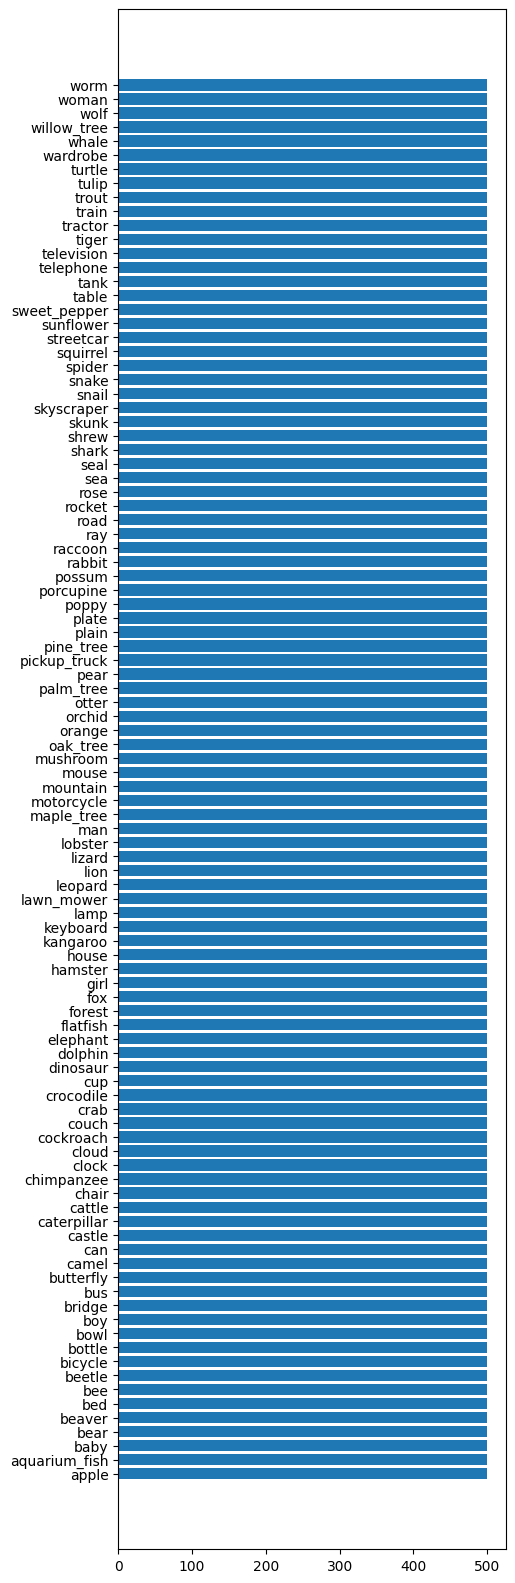

In [7]:
# see how many instances of each class there are
values, counts  = list(np.unique(train_labels, return_counts=True))
class_frequency = list(zip(list(values), list(counts)))

plt.figure(figsize=(5, 20))
plt.barh(y=values, width=counts)

In [8]:
def filter_classes(classes: list, x_train: np.array, y_train: np.array, x_test: np.array, y_test: np.array):
    """
    Filter the dataset for the specified class names from the dataset. All other entries will be droped.
    """
    # normalize labels to create a mask
    norm_y_train = y_train.T[0].tolist()
    norm_y_test = y_test.T[0].tolist()

    # the class ids that are used in y_train, y_test
    select_labels = []
    for class_name in classes:
        assert class_name in label_names, f"The class with the name '{class_name}' doesnt exist."
        select_labels.append(label_names.index(class_name))
    
    # select train data points
    train_mask = np.isin(norm_y_train, select_labels)
    
    # select test data points
    test_mask = np.isin(norm_y_test, select_labels)

    return x_train[train_mask], y_train[train_mask], x_test[test_mask], y_test[test_mask]

x_train, y_train, x_test, y_test = filter_classes(["can", "bottle", "cup"], x_train, y_train, x_test, y_test)

In [9]:
# this should be the same as the selected sum of datapoints for the selected classes 
len(x_train)

1500

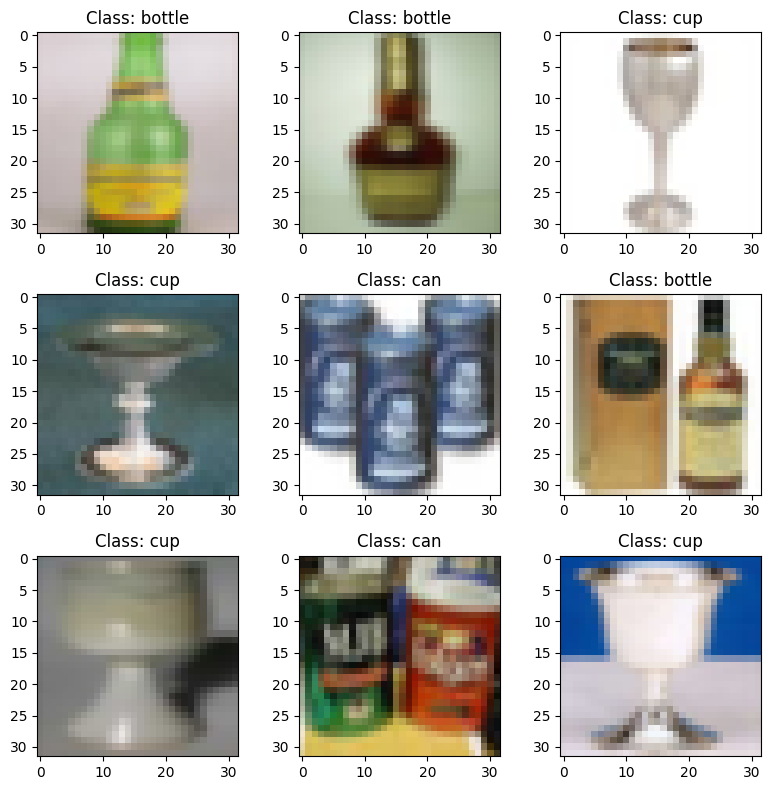

In [10]:
# visualize the remaining data
fig, ax = plt.subplots(3,3)
fig.set_size_inches(8,8)
for i in range(3):
    for j in range (3):
        l = random.randint(0, len(y_test))
        ax[i,j].imshow(x_test[l])
        ax[i,j].set_title('Class: ' + label_names[y_test.T[0][l]])

plt.tight_layout()

## Step 2: Select a backbone
Since the model will be deployed on a RaspberryPi we need a model with few parameters to respect the constraints of the IoT device.

In [13]:
# select the backbone model that will be placed on the Raspberry Pi
mobile_net_backbone = keras.applications.MobileNetV3Large(
    input_shape=(32, 32, 3),
    alpha=1.0,
    minimalistic=False,
    include_top=False, #remove the head; only use as backbone
    weights="imagenet",
    input_tensor=None,
    #classes=3, # cup, bottle, can

    pooling=None,
    dropout_rate=0.2,
    classifier_activation="softmax",
    include_preprocessing=True,
)

# TODO: Transfer learning, fine-tuning

/Users/dom/miniconda3/envs/images/lib/python3.10/site-packages/keras/src/applications/mobilenet_v3.py:512: UserWarning: `input_shape` is undefined or non-square, or `rows` is not 224. Weights for input shape (224, 224) will be loaded as the default.
  return MobileNetV3(
2024-06-29 16:54:47.484329: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-06-29 16:54:47.484370: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-06-29 16:54:47.484375: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-06-29 16:54:47.484596: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-06-29 16:54:47.484618: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0

12683000/12683000 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


## Step 3: Create a Data Augmentation pipeline

In [21]:
SEED = 1234567842
augmentation_pipeline = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical", seed=SEED),
    layers.RandomRotation(0.2, seed=SEED),
    layers.RandomZoom((0, -0.25), seed=SEED), #zooms in horizontal and vertical direction and preserves aspect ratio
    layers.RandomBrightness((-0.2, 0.2), seed=SEED), # increase and decrease between 20%
    layers.Lambda(lambda x: tf.cast(x,tf.int32))
])

# TODO: Integrate stack ontop of model and fine-tune

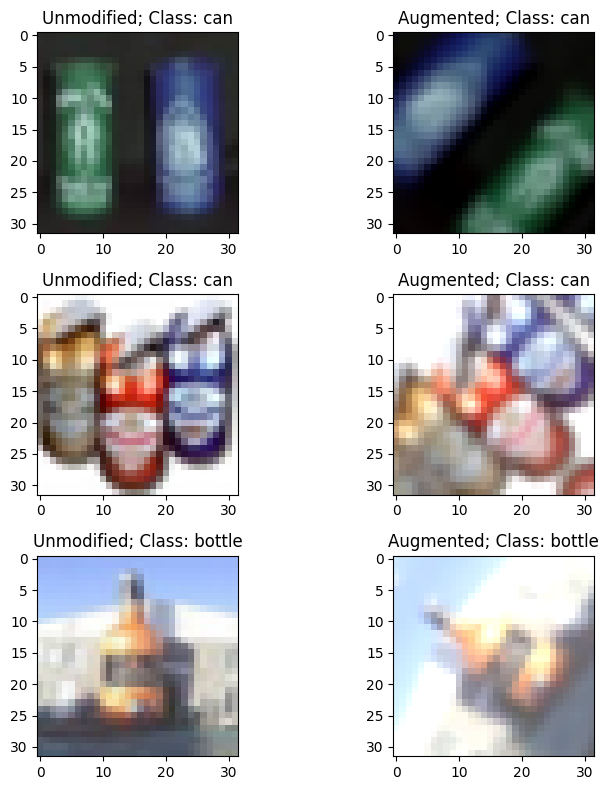

In [23]:
# test the data augmentation pipeline

fig, ax = plt.subplots(3,2)
fig.set_size_inches(8,8)
for i in range(3):
    l = random.randint(0, len(y_test))
    sample = x_test[l]
    #print("Original:", sample)
    ax[i,0].imshow(sample)
    ax[i,0].set_title('Unmodified; Class: ' + label_names[y_test.T[0][l]])

    augmented = augmentation_pipeline(sample)
    #print("augmented:", augmented)
    ax[i,1].imshow(augmented)
    ax[i,1].set_title('Augmented; Class: ' + label_names[y_test.T[0][l]])

plt.tight_layout()